In [26]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize  
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load the datasets
leadTime = pd.read_csv('../../Data/Prepped/lead_time_data.csv')
salesForecast = pd.read_csv('../../Data/Prepped/sales_forecast_data.csv')



### Outlier treatment (Winsorization) - salesForcast table

Missing values in SalesQuantity: 0


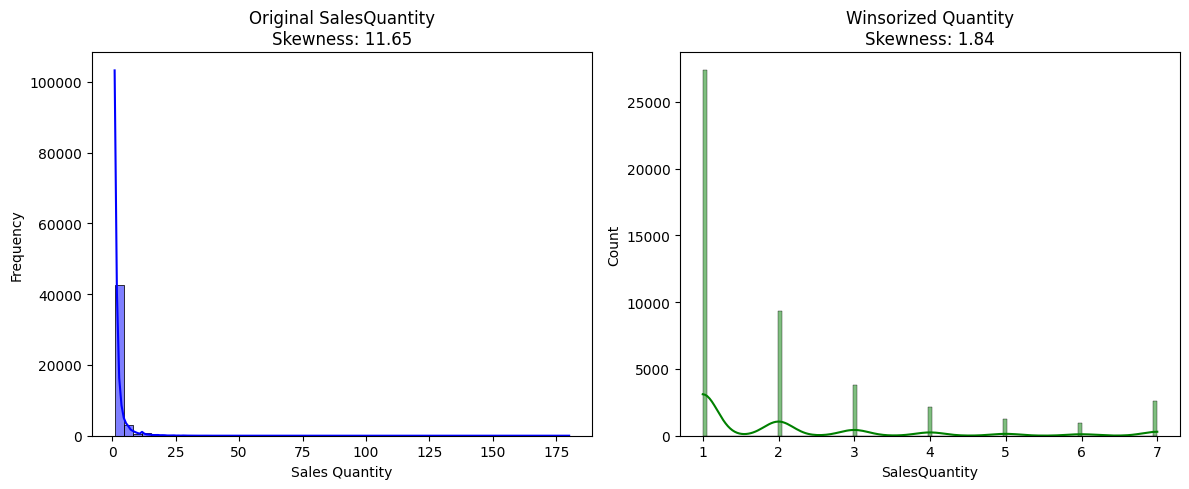


Original SalesQuantity Statistics:
count   47477.00
mean        2.32
std         3.30
min         1.00
25%         1.00
50%         1.00
75%         2.00
max       180.00
Name: SalesQuantity, dtype: float64

Winsorized SalesQuantity Statistics:
count   47477.00
mean        2.03
std         1.67
min         1.00
25%         1.00
50%         1.00
75%         2.00
max         7.00
Name: SalesQuantity, dtype: float64


c:\Users\waldo\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



Winsorized DataFrame saved to '../../Data/Final/sales_forecast_data.csv'
Original DataFrame remains unchanged in '../../Data/Prepped/sales_forecast_data.csv'


In [30]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize  
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load the datasets
prep_file_path = '../../Data/Prepped/sales_forecast_data.csv'
final_file_path = '../../Data/Final/sales_forecast_data.csv'

# Create a copy for winsorization to ensure original data remains untouched
winsorized_forecast = salesForecast.copy()

# Check for missing values in SalesQuantity
print("Missing values in SalesQuantity:", salesForecast['SalesQuantity'].isnull().sum())

# Apply winsorization to 'SalesQuantity' at the 5th and 95th percentiles
winsorized_forecast['SalesQuantity'] = winsorize(winsorized_forecast['SalesQuantity'], limits=(0.05, 0.05))

# Visualize the original and winsorized data
plt.figure(figsize=(12, 5))

# Histogram of original data
plt.subplot(1, 2, 1)
sns.histplot(data=salesForecast, x="SalesQuantity", bins=50, kde=True, color='blue')
plt.title(f"Original SalesQuantity\nSkewness: {salesForecast['SalesQuantity'].skew():.2f}")
plt.xlabel("Sales Quantity")
plt.ylabel("Frequency")
# Histogram of winsorized data
plt.subplot(1, 2, 2)
sns.histplot(winsorized_forecast['SalesQuantity'], kde=True, color='green')
plt.title(f'Winsorized Quantity\nSkewness: {winsorized_forecast['SalesQuantity'].skew():.2f}')
plt.tight_layout()
plt.show()

# Compare summary statistics
print("\nOriginal SalesQuantity Statistics:")
print(salesForecast['SalesQuantity'].describe())
print("\nWinsorized SalesQuantity Statistics:")
print(winsorized_forecast['SalesQuantity'].describe())

# Save the winsorized DataFrame to the Final folder with the same name as the original
winsorized_forecast.to_csv(final_file_path, index=False)
print(f"\nWinsorized DataFrame saved to '{final_file_path}'")
print(f"Original DataFrame remains unchanged in '{prep_file_path}'")

In [28]:
leadTime.describe().T

,count,mean,std,min,25%,50%,75%,max
LeadTimeDays,70830.00,7.98,2.23,3.00,6.00,8.00,10.00,14.00
ItemID,70830.00,12389.42,12616.50,58.00,3612.00,6438.00,18787.00,90631.00
StoreID,70830.00,1.40,0.49,1.00,1.00,1.00,2.00,2.00
Quantity,70830.00,14.33,21.38,1.00,6.00,11.00,12.00,407.00
Week,70830.00,28.01,15.12,1.00,16.00,28.00,41.00,53.00
Month,70830.00,6.84,3.45,1.00,4.00,7.00,10.00,12.00
Day,70830.00,2.65,2.00,0.00,1.00,2.00,4.00,6.00


### From the above we can see that the lead time is already. Thus we are only going to be applying it to quantity.

Missing values in Quantity: 0


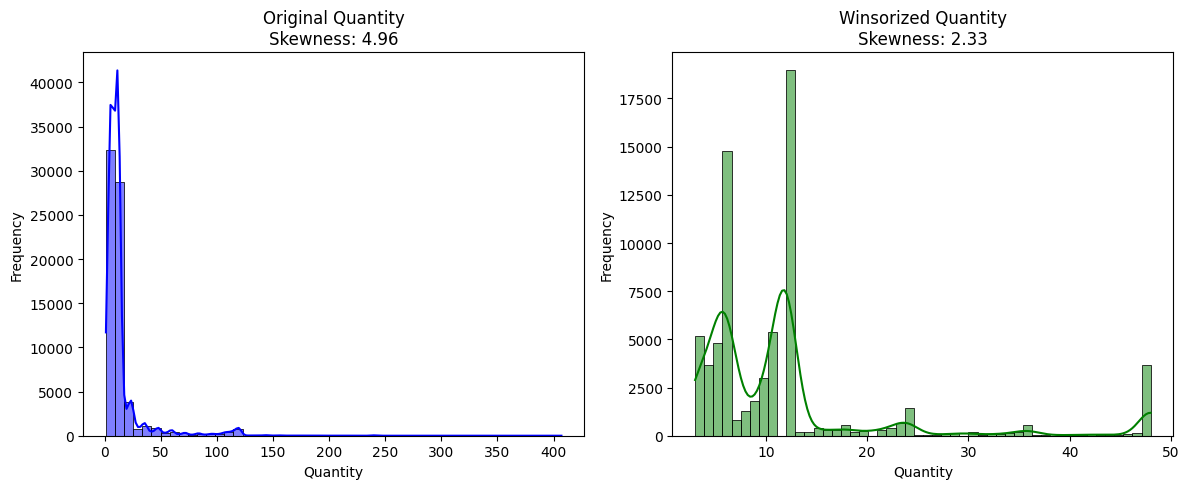


Original Quantity Statistics:
count   70830.00
mean       14.33
std        21.38
min         1.00
25%         6.00
50%        11.00
75%        12.00
max       407.00
Name: Quantity, dtype: float64

Winsorized Quantity Statistics:
count   70830.00
mean       12.06
std        10.63
min         3.00
25%         6.00
50%        11.00
75%        12.00
max        48.00
Name: Quantity, dtype: float64


c:\Users\waldo\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



Winsorized DataFrame saved to '../../Data/Final/lead_time_data.csv'


In [29]:

# Load the datasets
prep_file_path = '../../Data/Prepped/lead_time_data.csv'
final_file_path = '../../Data/Final/lead_time_data.csv'

#  Create a copy for winsorization to ensure original data remains untouched
winsorized_leadTime = leadTime.copy()

# Check for missing values
print("Missing values in Quantity:", leadTime['Quantity'].isnull().sum())

# Apply winsorization to both columns at the 5th and 95th percentiles
winsorized_leadTime['Quantity'] = winsorize(winsorized_leadTime['Quantity'], limits=(0.05, 0.05))


# Create a figure for Quantity visualization
plt.figure(figsize=(12, 5))

# Histogram of original quantity data
plt.subplot(1, 2, 1)
sns.histplot(data=leadTime, x="Quantity", bins=50, kde=True, color='blue')
plt.title(f"Original Quantity\nSkewness: {leadTime['Quantity'].skew():.2f}")
plt.xlabel("Quantity")
plt.ylabel("Frequency")

# Histogram of winsorized quantity data
plt.subplot(1, 2, 2)
sns.histplot(data=winsorized_leadTime, x="Quantity", bins=50, kde=True, color='green')
plt.title(f"Winsorized Quantity\nSkewness: {winsorized_leadTime['Quantity'].skew():.2f}")
plt.xlabel("Quantity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Compare summary statistics for Quantity
print("\nOriginal Quantity Statistics:")
print(leadTime['Quantity'].describe())
print("\nWinsorized Quantity Statistics:")
print(winsorized_leadTime['Quantity'].describe())

# Save the winsorized DataFrame to the Final folder with the same name as the original
winsorized_leadTime.to_csv(final_file_path, index=False)
print(f"\nWinsorized DataFrame saved to '{final_file_path}'")
